# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course

-Ricardo González Leal         
-A01639036

# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Ricardo González Leal

- ID: A01639036

- My carreer: ITC


# Importing libraries

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# A1 Load data

In [193]:
url = "A01639036.csv"
# Load the dataset
ds = pd.read_csv(url)

# A2 Data managment


Print the first 7 rows

In [228]:
ds.head(7)

,x1,x2,x3,x4,cluster
0,2.206517,2.810343,5.279552,4.981992,2
1,4.879323,0.502135,9.157466,8.296899,1
2,-4.618955,-4.664576,5.903059,4.823581,0
3,5.504270,0.641933,8.037689,8.585095,1
4,2.922551,3.978370,7.204105,4.486871,2
5,2.854258,0.487181,6.867114,9.945128,1
6,-0.160611,5.861949,4.662076,3.131869,2


Print the first 4 last rows

In [195]:
ds.tail(4)

,Unnamed: 0,x1,x2,x3,x4
9032,9032,2.347526,3.521323,5.537921,1.270385
9033,9033,1.735914,6.123392,3.653032,5.092242
9034,9034,9.375350,3.030336,9.436714,8.882536
9035,9035,5.525925,-0.114374,6.047313,9.811046


How many rows and columns are in your data?

Use the `shape` method


In [196]:
ds.shape
#9036 filas
#5 columnas

(9036, 5)

Print the name of all columns 

Use the `columns` method

In [197]:
ds.columns
#Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4'], dtype='object')

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [198]:
ds.dtypes
#Unnamed: 0      int64
#x1            float64
#x2            float64
#x3            float64
#x4            float64
#dtype: object

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
dtype: object

What is the meaning of rows and columns?

In [199]:
# Your responses here

# 1) Unnamed 0: Representa el índice de la fila. 
# Las columnas son el número de variables de cada observación.
# Las filas representan las observaciones o mediciones realizadas. 
# 2) x1, x2, x3 y x4 son 4 valores diferentes, que contienenen números decimales los cuales no se puede saber qué 
#significan específicamente, sin embargo todos ellos son mediciones.  

# 3) 

#...

Print a statistical summary of your columns


In [200]:
ds.describe()

,Unnamed: 0,x1,x2,x3,x4
count,9036.00000,9036.000000,9036.000000,9036.000000,9036.000000
mean,4517.50000,0.324774,-0.332019,6.544012,7.244790
std,2608.61285,4.974461,4.090702,1.887146,2.381198
min,0.00000,-12.182419,-10.090292,-0.325443,0.227868
25%,2258.75000,-4.900509,-4.329863,5.242165,5.460756
50%,4517.50000,1.263701,0.444241,6.516289,7.325395
75%,6776.25000,4.634886,3.065325,7.830955,9.021480
max,9035.00000,10.359221,8.540907,13.016207,15.036849


In [201]:
# 1) What is the minumum and maximum values of each variable
print(ds.min())
print(ds.max())

# 2) What is the mean and standar deviation of each variable

print("mean",ds.mean())
print("std",ds.std())

# 3) What the 25%, 50% and 75% represent?

    #25%, x1(2259) = 0.291707
    #50%, x1(4518) = 3.890884
    #75%, x1(6777) = -4.642271	

    # Para la variable x1:
    # min: -12.182419
    # max: 10.359221
    # mean: 0.324774
    # std: 4.974461
    
    # Para la variable x2:
    # min: -10.090292
    # max: 8.540907
    # mean: -0.332019
    # std: 4.090702
    
    # Para la variable x3:
    # min: -0.325443
    # max: 13.016207
    # mean: 6.544012
    # std: 1.887146
    
    # Para la variable x4:
    # min: 0.227868
    # max: 15.036849
    # mean: 7.244790
    # std: 2.381198


Unnamed: 0     0.000000
x1           -12.182419
x2           -10.090292
x3            -0.325443
x4             0.227868
dtype: float64
Unnamed: 0    9035.000000
x1              10.359221
x2               8.540907
x3              13.016207
x4              15.036849
dtype: float64
mean Unnamed: 0    4517.500000
x1               0.324774
x2              -0.332019
x3               6.544012
x4               7.244790
dtype: float64
std Unnamed: 0    2608.612850
x1               4.974461
x2               4.090702
x3               1.887146
x4               2.381198
dtype: float64


Rename the columns using the same name with capital letters

In [202]:
ds = ds.rename(columns={"x1":"X1","x2": "X2","x3": "X3","x4": "X4"})
ds


,Unnamed: 0,X1,X2,X3,X4
0,0,2.206517,2.810343,5.279552,4.981992
1,1,4.879323,0.502135,9.157466,8.296899
2,2,-4.618955,-4.664576,5.903059,4.823581
3,3,5.504270,0.641933,8.037689,8.585095
4,4,2.922551,3.978370,7.204105,4.486871
...,...,...,...,...,...
9031,9031,5.017720,-0.667181,6.271193,8.265682
9032,9032,2.347526,3.521323,5.537921,1.270385
9033,9033,1.735914,6.123392,3.653032,5.092242
9034,9034,9.375350,3.030336,9.436714,8.882536


Rename the columns to their original names

In [203]:
ds = ds.rename(columns={"X1":"x1","X2":"x2","X3":"x3","X4":"x4"})
ds

,Unnamed: 0,x1,x2,x3,x4
0,0,2.206517,2.810343,5.279552,4.981992
1,1,4.879323,0.502135,9.157466,8.296899
2,2,-4.618955,-4.664576,5.903059,4.823581
3,3,5.504270,0.641933,8.037689,8.585095
4,4,2.922551,3.978370,7.204105,4.486871
...,...,...,...,...,...
9031,9031,5.017720,-0.667181,6.271193,8.265682
9032,9032,2.347526,3.521323,5.537921,1.270385
9033,9033,1.735914,6.123392,3.653032,5.092242
9034,9034,9.375350,3.030336,9.436714,8.882536


Use two different alternatives to get one of the columns

In [204]:
a = ds.x1
b = ds["x1"]
print(a)
print(b)

0       2.206517
1       4.879323
2      -4.618955
3       5.504270
4       2.922551
          ...   
9031    5.017720
9032    2.347526
9033    1.735914
9034    9.375350
9035    5.525925
Name: x1, Length: 9036, dtype: float64
0       2.206517
1       4.879323
2      -4.618955
3       5.504270
4       2.922551
          ...   
9031    5.017720
9032    2.347526
9033    1.735914
9034    9.375350
9035    5.525925
Name: x1, Length: 9036, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [205]:
print(ds.loc[62:72,["x2", "x3"]])

#          x2        x3
#62  0.065448  7.289488
#63 -3.631765  3.496368
#64 -4.950642  6.437747
#65  3.733011  6.081857
#66 -3.062477  3.857180
#67 -0.340081  7.995981
#68 -0.807102  8.275546
#69 -3.970017  5.526901
#70 -6.820091  7.276309
#71 -0.189956  5.633276
#72  2.878880  5.187275

          x2        x3
62  0.065448  7.289488
63 -3.631765  3.496368
64 -4.950642  6.437747
65  3.733011  6.081857
66 -3.062477  3.857180
67 -0.340081  7.995981
68 -0.807102  8.275546
69 -3.970017  5.526901
70 -6.820091  7.276309
71 -0.189956  5.633276
72  2.878880  5.187275


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [206]:
print(ds.x2.notnull().sum())
print(ds.x3.notnull().sum())

print(ds.x2.isnull().sum())
print(ds.x3.isnull().sum())

#NotNull values in x2:  9036
#NotNull values in x2:  9036
#Null values in x3:  0
#Null values in x3:  0

9036
9036
0
0


Discard the last column


In [207]:
ds = ds.drop(['Unnamed: 0'],axis=1)
ds


,x1,x2,x3,x4
0,2.206517,2.810343,5.279552,4.981992
1,4.879323,0.502135,9.157466,8.296899
2,-4.618955,-4.664576,5.903059,4.823581
3,5.504270,0.641933,8.037689,8.585095
4,2.922551,3.978370,7.204105,4.486871
...,...,...,...,...
9031,5.017720,-0.667181,6.271193,8.265682
9032,2.347526,3.521323,5.537921,1.270385
9033,1.735914,6.123392,3.653032,5.092242
9034,9.375350,3.030336,9.436714,8.882536


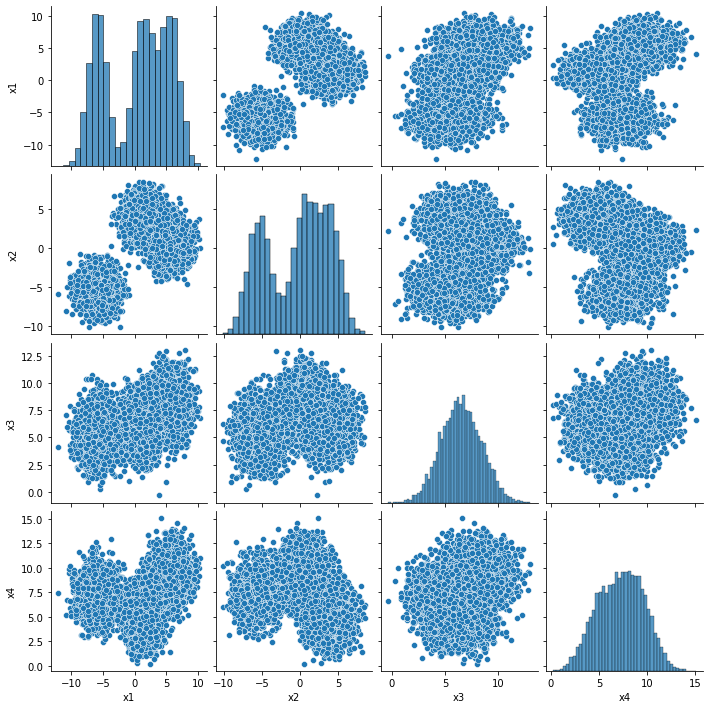

In [208]:
sns.pairplot(ds)

### Questions 

Based on the previos results, provide a description of yout dataset

Your response: Hasta este punto me pude dar cuenta de que el dataset no contiene ningún valor nulo, asímismo removí la primer columna ya que no es relevante para el análisis. Asímismo, después de haber calculado los valores mínimos, máximos, promedio y std de cada variable, me dí cuenta de que los valores de x1 son muy parecidos a los de x2, mientras que los de x3 son muy parecidos a los de x4. 




# A3 Data visualization

Plot in the same figure the histogram of the two variables

C:\Users\ricar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


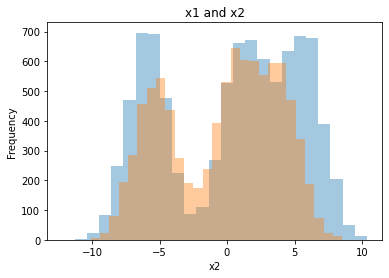

In [209]:
sns.distplot(ds["x1"], kde = False)
x = sns.distplot(ds["x2"], kde = False)
x.set_ylabel("Frequency")
x.set_title("x1 and x2")
plt.show()

Based on this plots, provide a description of your data:

Your response here: 
En base a la gráfica se puede observar que tanto x1 como x2 tienen una frecuencia similar en cada uno de sus valores, aunque en general, los de x1 tienen una mayor frecuencia

Plot in the same figure the boxplot of the two variables 

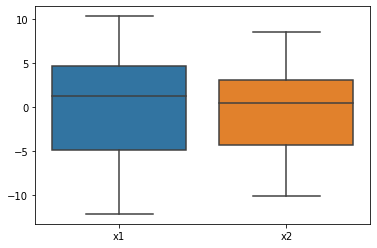

In [210]:
Xdata = ds.loc[:,["x1", "x2"]]
sns.boxplot(data=Xdata, orient="v")
plt.show()

Scatter plot of the two variables

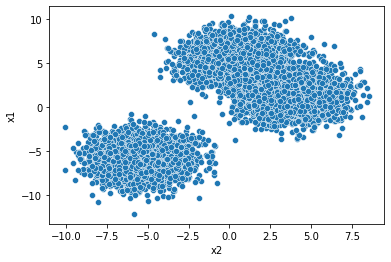

In [211]:
# scatter plot between two variables
sns.scatterplot(data=ds, y="x1", x="x2")
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:
Me dí cuenta de que x2 tiene una relación muy similar a x1, ya que en el histograma, prácticamente la frecuencia es muy similar en cada valor, asímismo en el boxplot tanto los límites inferior y superor están muy similares entre ellos (sólamente x2 presenta una escala un poco menor en comparación a x1). 
Finalmente en el scatterplot parece que el número de clústers son 2. 




# A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [212]:
# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['x1','x2','x3','x4']])
# Print estimated cluster of each point in the dataser
print(yp)

[2 1 0 ... 2 1 1]


Add to your dataset a column with the assihned cluster to each data point

In [213]:
ds["cluster"] = yp
ds

,x1,x2,x3,x4,cluster
0,2.206517,2.810343,5.279552,4.981992,2
1,4.879323,0.502135,9.157466,8.296899,1
2,-4.618955,-4.664576,5.903059,4.823581,0
3,5.504270,0.641933,8.037689,8.585095,1
4,2.922551,3.978370,7.204105,4.486871,2
...,...,...,...,...,...
9031,5.017720,-0.667181,6.271193,8.265682,1
9032,2.347526,3.521323,5.537921,1.270385,2
9033,1.735914,6.123392,3.653032,5.092242,2
9034,9.375350,3.030336,9.436714,8.882536,1


Print the number associated to each cluster

In [214]:
ds.cluster.unique()

array([2, 1, 0])

Print the centroids

In [215]:
km.cluster_centers_

array([[-5.90755672, -5.35135069,  5.27529702,  7.42982146],
       [ 5.6014884 ,  0.48540889,  8.04674197,  9.4444137 ],
       [ 1.28898037,  3.86315535,  6.31345109,  4.86924803]])

Print the intertia metric

In [216]:
km.inertia_

80191.26232784822

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

<ipython-input-217-8283b33b0c5b>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(ds1.x1, ds1.x2, ds1.x3, ds1.x4, Label='Cluster 0')
<ipython-input-217-8283b33b0c5b>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(ds2.x1, ds2.x2, ds2.x3, ds2.x4, Label='Cluster 1')
C:\Users\ricar\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
<ipython-input-217-8283b33b0c5b>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(ds3.x1, ds3.x2, ds3.x3, ds3.x4, Label='Cluster 2')


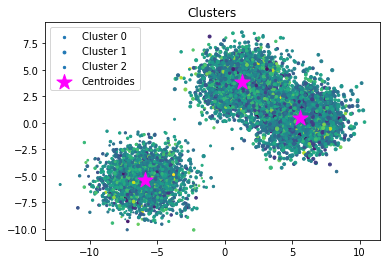

In [217]:
ds1 = ds[ds.cluster==0]
ds2 = ds[ds.cluster==1]
ds3 = ds[ds.cluster==2]

plt.scatter(ds1.x1, ds1.x2, ds1.x3, ds1.x4, Label='Cluster 0')
plt.scatter(ds2.x1, ds2.x2, ds2.x3, ds2.x4, Label='Cluster 1')
plt.scatter(ds3.x1, ds3.x2, ds3.x3, ds3.x4, Label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Questions 

Provides a detailed description of your results

Your response:
Gracias a las gráficas obtenidas por el scatterplot, me pude dar cuenta de que el número de clústers más adecuado para este análisis es de 3. Partiendo de esto, utilicé Kmeans para poder obtener los centroides y la inércia, así como una representación gráfica en la que se ven los clusters junto con sus centroides respectivos, al concluir con esto me di cuenta de que 3 clústers si es el número adecuado.

# A4 Elbow plot

Compute the Elbow plot

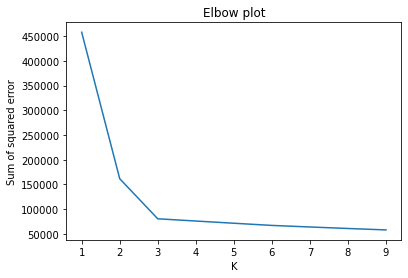

In [221]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(ds[['x1','x2','x3','x4']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)
Your response:
El mejor número de clústers para estos datos es de 3. 
El primer análisis que realicé fue haciendo múltiples scatterplots, en donde me dí cuenta que en la mayoría se presentaban agrupaciones de 3. Posteriormente calculé la inercia haciendo uso de Kmeans (cabe mencionar que esto lo hice tanto para 2 clústers como para 3 clústers) y me dí cuenta que el menor valor de la inercia se presentaba al tener 3 clústers. Posteriormente realicé los scatterplot en los que se muestran los centroides, los cuales gráficamente vi que concordaban muy bien. Finalmente realicé el Elbow Plot y efectivamente corroboré que sí son 3 clusters, ya que pueden apreciar 3 cambios abruptos durante toda la gráfica. 

Does this number of clusters agree with your inital guess? (argue your response)
Your response:
Sí, ya que inicialmente me dejé llevar por el número de clusters que ví en los scatterplots, posteriormente continué corroborando y me dí cuenta de que si era lo adecuado.


# BONUS

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID

- 2 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



2) Plot the scatter plot of your data using the real cluster labels

3) Do K means clustering 

4) Plot the scatter plot of your data using the estimated cluster labels

### Questions 

Provides a detailed description of your results.

Your response:

# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:
Durante esta Semana Tec aprendí no únicamente a utilizar comandos de consola y a cómo trabajar con GitHub colaborando con más personas por medio de un repositorio remoto el cuál puedo controlar desde mi computadora como un repositorio local; si no que también aprendí a leer datos y realizar análisis de estos mismos, llevando a cabo distintas funcionalidades haciendo uso de las librerias de pandas, seaborn y matplotlib, dentro del lenguaje de programación de Python. Asímismo aprendí sobre Machine Learning y la implementación del algoritmo de Machine Learning del tipo no supervisado, llamado "kmeans", el cual pude utilizar para obtener los clusters de distintos conjuntos de datos, para posteriormente encontrar sus centroides y verlos gráficamente.
El haber trabajado y manipulado estos datos realizando distintos análisis hicieron que pudiera llegar a ciertas conclusiones y deducciones finales. 

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
Durante esta Semana Tec aprendí sobre teoría básica sobre Machine Learning así como su clasificación. Específicamente trabajé 
con el algoritmo no supervisado de kmeans.  Kmeans es un algoritmo de clusterización con el cual, estuve trabajando con información acerca de flores, y posteriormente con otros datos proporcionados para la evidecia. Con Kmeans fui pude obtener los clusters de conjuntos de datos con características comúnes, así como ver los centroides representados de manera gráfica.
No únicamente aprendí sobre Kmeans, sino que también aprendí sobre las funciones de cada una de las librerias vistas para
analizar datos, realizando scatterplots, histogramas, boxplots, obtener valores matemáticos, agregar, renombrar y eliminar columnas, etc.
Ahora sé que todas estas herramientas y funcionalidades me son de gran valor y de utilizad al momento de realizar análisis de datos como estos. 